In [177]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from prettytable import PrettyTable

from plotly.subplots import make_subplots


#Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgbm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor




from catboost import CatBoostRegressor

#from sklego.linear_model import LADRegression
from xgboost import XGBRegressor
from scipy.stats import yeojohnson
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# **2. Data Collection**

In [178]:
import pandas as pd

# Definisikan nama file
filename = "booking_dataset_2024_06_03.csv"

# Membaca dataset dari file CSV
raw_data = pd.read_csv(filename)
df = raw_data
data_eda =raw_data

# Menampilkan 5 baris pertama dari dataset
raw_data.head()

,booking_id,booking_status,booking_check_in,booking_check_out,booking_guest_number,booking_earned,booking_currency,booking_received_timestamp,listing_id,review_sentiment,...,workspace,pool,parking,gym,kitchen,property_id1,area_id,area_name,area_distance_to_airport,airport_pickup_price_idr
0,2REFMR,1,2016-04-06,2016-04-16,NaN,2549.0,2,NaN,6384209,positive,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0
1,9NBTPK,1,2016-04-02,2016-04-05,NaN,986.0,2,NaN,945876,positive,...,1.0,1.0,1.0,0.0,1.0,PR0242,A0012,Nusa Dua,45 minutes,325000.0
2,A2SQJN,1,2016-10-06,2016-10-08,NaN,873.0,2,NaN,945876,positive,...,1.0,1.0,1.0,0.0,1.0,PR0242,A0012,Nusa Dua,45 minutes,325000.0
3,AKJCTJ,1,2015-10-30,2015-11-04,NaN,2182.0,2,NaN,6384209,positive,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0
4,B3T92M,1,2016-10-10,2016-10-14,NaN,1967.0,2,NaN,6384209,positive,...,1.0,1.0,1.0,0.0,1.0,PR0196,A0012,Nusa Dua,45 minutes,325000.0


In [179]:
df = raw_data
data_eda =raw_data

In [180]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  56825 non-null  object 
 1   booking_status              56825 non-null  int64  
 2   booking_check_in            56825 non-null  object 
 3   booking_check_out           56825 non-null  object 
 4   booking_guest_number        9015 non-null   float64
 5   booking_earned              56825 non-null  float64
 6   booking_currency            56825 non-null  int64  
 7   booking_received_timestamp  30445 non-null  object 
 8   listing_id                  56825 non-null  object 
 9   review_sentiment            6030 non-null   object 
 10  review_sentiment_score      6030 non-null   float64
 11  cancellation_policy         0 non-null      float64
 12  booking_earned_in_idr       56825 non-null  float64
 13  length_of_stay              568

In [181]:
raw_data.describe()

,booking_status,booking_guest_number,booking_earned,booking_currency,review_sentiment_score,cancellation_policy,booking_earned_in_idr,length_of_stay,booking_window,seasonality,...,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,9015.000000,5.682500e+04,56825.000000,6030.000000,0.0,5.682500e+04,56825.000000,30445.000000,56825.000000,...,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.063968,2.618525,1.571828e+06,1.233295,0.729690,NaN,2.675725e+06,2.839366,23.068944,0.372107,...,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.281550,2.274074,3.034301e+06,0.427279,0.413806,NaN,4.568150e+06,2.982119,36.979856,0.483371,...,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,0.000000,0.000000e+00,1.000000,-0.998203,NaN,0.000000e+00,-30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,2.000000,6.450000e+02,1.000000,0.704758,NaN,6.984000e+05,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,7.992800e+05,1.000000,0.887651,NaN,1.374490e+06,2.000000,6.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,2.000000,1.778367e+06,1.000000,0.972097,NaN,2.789421e+06,3.000000,31.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,6.000000,30.000000,9.429215e+07,3.000000,0.999999,NaN,1.303185e+08,349.000000,383.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [182]:
raw_data.isnull().sum()

booking_id                        0
booking_status                    0
booking_check_in                  0
booking_check_out                 0
booking_guest_number          47810
booking_earned                    0
booking_currency                  0
booking_received_timestamp    26380
listing_id                        0
review_sentiment              50795
review_sentiment_score        50795
cancellation_policy           56825
booking_earned_in_idr             0
length_of_stay                    0
booking_window                26380
seasonality                       0
average_daily_rate                0
unit_id                          14
status                          447
bedroom                         513
bathroom                      11595
beds                          11595
capacity                      15556
property_id                     447
avg_daily_rate_per_unit           0
wifi                          14743
tv                            14743
cable_tv                    

# **3. EDA** 

**Analisis Data Eksplorasi (EDA)** adalah salah satu teknik yang digunakan untuk mengekstraksi fitur dan tren vital yang digunakan oleh pembelajaran mesin dan model pembelajaran mendalam dalam Sains Data. Memahami data secara menyeluruh membutuhkan eksplorasi dari setiap aspek. Fitur yang berdampak memungkinkan pengambilan keputusan yang bermakna dan bermanfaat; oleh karena itu, EDA menempati tempat yang tak ternilai dalam Sains Data.

**Types of Exploratory Data Analysis**

1. Univariate
2. Bivariate
3. Multivariate


In [183]:
mask = df['area_name'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=mask['area_name'],
        title="Top 10 Frequent of area",
                  titlefont={'size':18, 'family': 'Serif',},
         values=mask['count'],
        hole=0.5,
        )
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )
fig.layout.update(title="<b>Count of daerah properti<b>",
                  titlefont={'size':24, 'family': 'Serif',},
                  showlegend=False, 
                  height=700, 
                  width=700, 
                  template=None, 
                 )

fig.show()

In [184]:
import plotly.graph_objects as go

# Assuming df is already defined
mask = df['property_id'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

print(mask.columns)  # To verify the column names

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mask.iloc[:, 0],  # Using iloc to access the first column
        y=mask['count'],
        text=mask['percentage'],
        textposition='auto',
    )
)

fig.update_layout(
    title="<b>Count of Property ID<b>",
    titlefont={'size':24, 'family': 'Serif'},
    xaxis_title="Property ID",
    yaxis_title="Count",
    showlegend=False,
    height=700,
    width=700,
    template=None,
)

fig.show()


Index(['property_id', 'count', 'percentage'], dtype='object')


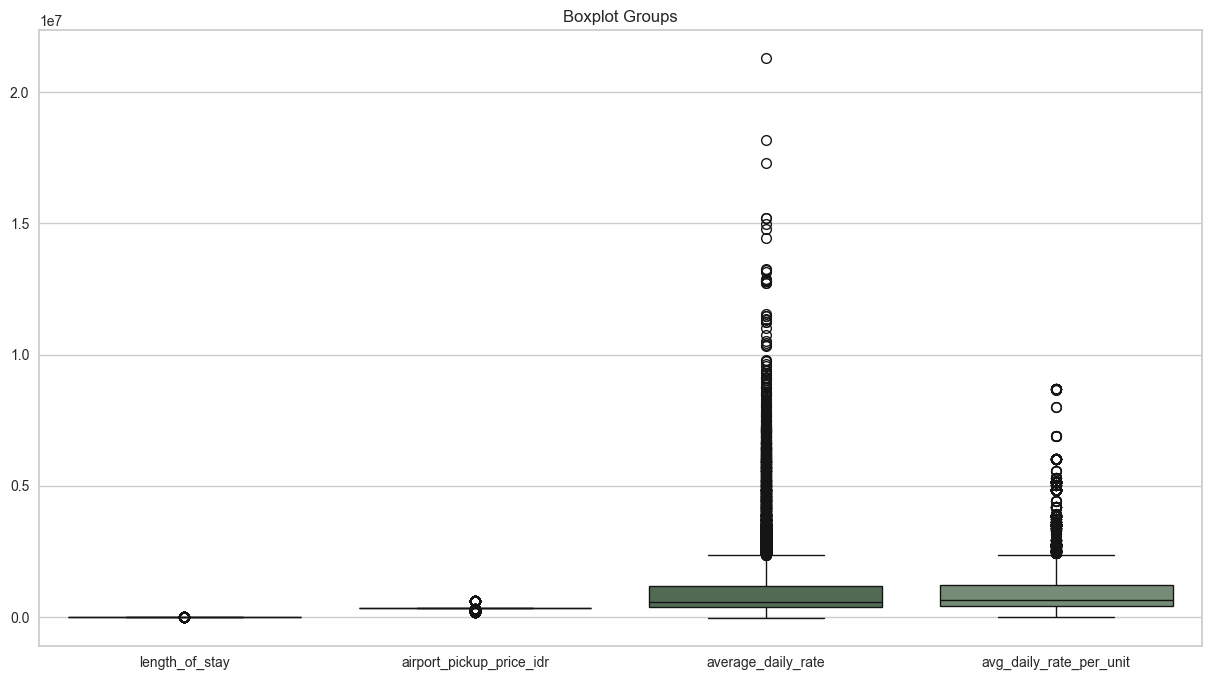

Lower, Upper Bounds, and Median for Quartiles:
+--------------------------+-------------------+--------------------+-----------+
|          Column          |    Lower Bound    |    Upper Bound     |   Median  |
+--------------------------+-------------------+--------------------+-----------+
|      length_of_stay      |        1.0        |        6.0         |    2.00   |
| airport_pickup_price_idr |      325000.0     |      325000.0      | 325000.00 |
|    average_daily_rate    |      357199.5     |     2374200.75     | 558818.00 |
| avg_daily_rate_per_unit  | 419382.3529411765 | 2374608.6242843624 | 649240.39 |
+--------------------------+-------------------+--------------------+-----------+


In [185]:
columns = df[['length_of_stay', 'airport_pickup_price_idr','average_daily_rate', 'avg_daily_rate_per_unit']]
pal = ['#163020', '#3A4D39', '#4F6F52', '#739072', '#98BF97', '#B1DEAF', '#B9E8B7', '#C7F7C6']

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

In [186]:
cols = [col for col in df.columns if df[col].dtype != 'object'][1:]
corr = df[cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix (cont. features)<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=1000, height=750,
                  margin=dict(l=150, r=100, b=100, t=100),
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()


## **4 Data Pre-Prosessing**

**Data Pre-Prosessing** adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik sebelum melakukan modeling.


In [187]:
def replace_outliers(column, lower_bound, upper_bound):
    mask = (column < lower_bound) | (column > upper_bound)
    column[mask] = column.clip(lower=lower_bound, upper=upper_bound)

# Define columns and their corresponding bounds
columns_and_bounds = {
    'average_daily_rate': (357199.5, 2374200.75 )}

# Replace outliers for each column
for column, (lower_bound, upper_bound) in columns_and_bounds.items():
    replace_outliers(raw_data['average_daily_rate'], lower_bound, upper_bound)


In [188]:

raw_data['booking_check_in'] = pd.to_datetime(raw_data['booking_check_in'])
raw_data['booking_check_out'] = pd.to_datetime(raw_data['booking_check_out'])

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if 'hour' in time_str:
        hours = int(time_str.split()[0])
        return hours * 60
    elif 'minute' in time_str:
        minutes = int(time_str.split()[0])
        return minutes
    else:
        return None

raw_data['area_distance_to_airport'] = raw_data['area_distance_to_airport'].apply(convert_to_minutes)

raw_data['booking_check_in_date'] = raw_data['booking_check_in'].dt.day
raw_data['booking_check_in_month'] = raw_data['booking_check_in'].dt.month
raw_data['booking_check_in_year'] = raw_data['booking_check_in'].dt.year

raw_data['booking_check_out_date'] = raw_data['booking_check_out'].dt.day
raw_data['booking_check_out_month'] = raw_data['booking_check_out'].dt.month
raw_data['booking_check_out_year'] = raw_data['booking_check_out'].dt.year



In [189]:
raw_data = raw_data.drop(['booking_id','booking_check_in','booking_check_out','booking_received_timestamp','cancellation_policy','status','booking_window'
], axis = 1)


In [190]:
raw_data.isnull().sum()

booking_status                  0
booking_guest_number        47810
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment            50795
review_sentiment_score      50795
booking_earned_in_idr           0
length_of_stay                  0
seasonality                     0
average_daily_rate              0
unit_id                        14
bedroom                       513
bathroom                    11595
beds                        11595
capacity                    15556
property_id                   447
avg_daily_rate_per_unit         0
wifi                        14743
tv                          14743
cable_tv                    14743
ac                          14743
workspace                   14743
pool                        14743
parking                     14743
gym                         14743
kitchen                     14743
property_id1                  578
area_id                       578
area_name     

In [191]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk kolom unit_id
raw_data['listing_id'] = label_encoder.fit_transform(raw_data['listing_id'])

raw_data['review_sentiment'] = label_encoder.fit_transform(raw_data['review_sentiment'])

raw_data['property_id1'] = label_encoder.fit_transform(raw_data['property_id1'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['property_id'] = label_encoder.fit_transform(raw_data['property_id'])

raw_data['area_id'] = label_encoder.fit_transform(raw_data['area_id'])

raw_data['area_name'] = label_encoder.fit_transform(raw_data['area_name'])

print(raw_data[['unit_id', 'review_sentiment','listing_id','property_id', 'area_id', 'area_name']].head())


   unit_id  review_sentiment  listing_id  property_id  area_id  area_name
0      335                 2        1817          154       11         13
1      334                 2        1893          192       11         13
2      334                 2        1893          192       11         13
3      335                 2        1817          154       11         13
4      335                 2        1817          154       11         13


In [192]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['bedroom', 'bathroom', 'beds', 'capacity','wifi','tv','cable_tv','ac','workspace','pool',
                          'booking_guest_number','parking','gym','kitchen']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
booking_earned_in_idr           0
length_of_stay                  0
seasonality                     0
average_daily_rate              0
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
avg_daily_rate_per_unit         0
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
property_id1                    0
are

In [193]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['booking_check_in_date','booking_check_in_month','booking_check_in_year',
                          'booking_check_in_year','booking_check_out_month','booking_check_out_year']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
booking_earned_in_idr           0
length_of_stay                  0
seasonality                     0
average_daily_rate              0
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
avg_daily_rate_per_unit         0
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
property_id1                    0
are

In [194]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
columns_to_impute = [ 'airport_pickup_price_idr','area_distance_to_airport','review_sentiment_score']
imputer = IterativeImputer(max_iter=10, random_state=0)

# Memilih subset data untuk kolom-kolom yang akan diimputasi
data_to_impute = raw_data[columns_to_impute]

# Melakukan imputasi
data_imputed = imputer.fit_transform(data_to_impute)

# Mengganti nilai yang telah diimputasi kembali ke dataset asli
raw_data[columns_to_impute] = data_imputed

# Menampilkan hasil imputasi
print("Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:")
print(raw_data[columns_to_impute].head())
raw_data.isnull().sum()

Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:
   airport_pickup_price_idr  area_distance_to_airport  review_sentiment_score
0                  325000.0                      45.0                0.655466
1                  325000.0                      45.0                0.656976
2                  325000.0                      45.0                0.687372
3                  325000.0                      45.0                0.979358
4                  325000.0                      45.0                0.670770


booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
booking_earned_in_idr       0
length_of_stay              0
seasonality                 0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
avg_daily_rate_per_unit     0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
property_id1                0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_ch

In [195]:
data = raw_data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_status            56825 non-null  int64  
 1   booking_guest_number      56825 non-null  float64
 2   booking_earned            56825 non-null  float64
 3   booking_currency          56825 non-null  int64  
 4   listing_id                56825 non-null  int32  
 5   review_sentiment          56825 non-null  int32  
 6   review_sentiment_score    56825 non-null  float64
 7   booking_earned_in_idr     56825 non-null  float64
 8   length_of_stay            56825 non-null  int64  
 9   seasonality               56825 non-null  int64  
 10  average_daily_rate        56825 non-null  float64
 11  unit_id                   56825 non-null  int64  
 12  bedroom                   56825 non-null  float64
 13  bathroom                  56825 non-null  float64
 14  beds  

In [196]:
data.isnull().sum()

booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
booking_earned_in_idr       0
length_of_stay              0
seasonality                 0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
avg_daily_rate_per_unit     0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
property_id1                0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_ch

In [197]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['average_daily_rate'])
y = data['average_daily_rate']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi dari data latih dan data uji
print("Dimensi data latih:", X_train.shape, y_train.shape)
print("Dimensi data uji:", X_test.shape, y_test.shape)

Dimensi data latih: (45460, 37) (45460,)
Dimensi data uji: (11365, 37) (11365,)


In [198]:
y = data['average_daily_rate']
x = data.drop('average_daily_rate', axis=1)

In [199]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi Min-Max pada fitur numerik
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Gabungkan kembali fitur yang sudah dinormalisasi dengan label
data_normalized = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [200]:
# apply polynomial since the features are not very linear with the label, and set the degree to 2 to prevent overfitting
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x)

### MODELING

In [201]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import lightgbm as lgb
import xgboost as xgb

class Model:
    def __init__(self, x, y, n_splits, repeated, rdm_seed, model, params):
        self.x = x
        self.y = y
        self.n_splits = n_splits
        self.repeated = repeated
        self.rdm_seed = rdm_seed
        self.model = model
        self.params = params
        self.cv_splitter = None
        self.best_model = None
        self.best_mae = float('inf')
        self.best_r2 = float('-inf')

    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x[train_idx]
            X_val = self.x[val_idx]
            y_train = self.y[train_idx]
            y_val = self.y[val_idx]
            yield X_train, X_val, y_train, y_val

    def fit(self, key):
        if key == 'lgbm':
            self._fit_lgbm()
        elif key == 'xgboost':
            self._fit_xgboost()
        elif key == 'hist_gradient_boosting':
            self._fit_hist_gradient_boosting()
        elif key == 'decision_tree':
            self._fit_decision_tree()
        elif key == 'bagging':
            self._fit_bagging()
        elif key == 'adaboost':
            self._fit_adaboost()

    def _fit_lgbm(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = lgb.LGBMRegressor(**self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds lgbm: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds lgbm: {np.mean(r2_per_fold):.5f}")

    def _fit_xgboost(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = xgb.XGBRegressor(**self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds xgboost: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds xgboost: {np.mean(r2_per_fold):.5f}")

    def _fit_hist_gradient_boosting(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = HistGradientBoostingRegressor(**self.params)
            model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds hist gradient boosting: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds hist gradient boosting: {np.mean(r2_per_fold):.5f}")

    def _fit_decision_tree(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = DecisionTreeRegressor(**self.params)
            model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds decision tree: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds decision tree: {np.mean(r2_per_fold):.5f}")

    def _fit_bagging(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), **self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds bagging: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds bagging: {np.mean(r2_per_fold):.5f}")

    def _fit_adaboost(self):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), **self.params)
            model.fit(X_train, y_train)
            y_val_preds = model.predict(X_val)
            val_mae = mean_absolute_error(y_val, y_val_preds)
            val_r2 = r2_score(y_val, y_val_preds)

            if val_mae < self.best_mae:
                self.best_mae = val_mae
                self.best_model = model
            if val_r2 > self.best_r2:
                self.best_r2 = val_r2

            print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
            mae_per_fold.append(val_mae)
            r2_per_fold.append(val_r2)

        print(f"Average MAE across all folds adaboost: {np.mean(mae_per_fold):.5f}")
        print(f"Average R² across all folds adaboost: {np.mean(r2_per_fold):.5f}")

    def predict(self):
        self.cv_splitter = self.split_data()
        all_mae = []
        all_r2 = []
        all_mae_train = []
        all_r2_train = []
        y_preds_list = []
        y_val_list = []
        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            if self.best_model is None:
                raise ValueError("Model has not been trained yet. Call 'fit()' method first.")
            else:
                y_preds = self.best_model.predict(X_val)
                mae = mean_absolute_error(y_val, y_preds)
                r2 = r2_score(y_val, y_preds)
                all_mae.append(mae)
                all_r2.append(r2)
                y_preds_list.append(y_preds)
                y_val_list.append(y_val)

                train_preds = self.best_model.predict(X_train)
                train_mae = mean_absolute_error(y_train, train_preds)
                train_r2 = r2_score(y_train, train_preds)
                all_mae_train.append(train_mae)
                all_r2_train.append(train_r2)
                print(f"FOLD {fold} | MAE Val: {mae:.5f} | R² Val: {r2:.5f} | MAE Train: {train_mae:.5f} | R² Train: {train_r2:.5f}")

        avg_mae = np.mean(all_mae)
        avg_r2 = np.mean(all_r2)
        avg_mae_train = np.mean(all_mae_train)
        avg_r2_train = np.mean(all_r2_train)
        print(f'Average MAE Val: {avg_mae:.5f} | Average R² Val: {avg_r2:.5f} | Average MAE Train: {avg_mae_train:.5f} | Average R² Train: {avg_r2_train:.5f}')
        return all_mae, all_r2, y_preds_list, y_val_list

    def feature_importance(self):
        if hasattr(self.best_model, 'feature_importances_'):
            feature_importances = self.best_model.feature_importances_
            feature_names = list(x.columns)
            feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
            feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)
            return feature_importances_df
        else:
            raise ValueError("The best model does not support feature importance")

    def inverse(self, y_preds, y_val):
        y_preds = np.expm1(y_preds)
        y_val = np.expm1(y_val)
        return y_preds, y_val

# Siapkan data

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['average_daily_rate'])
y = data['average_daily_rate']

# Definisikan parameter model
params_lgbm = {'n_estimators': 100, 'learning_rate': 0.1, 'random_state': 42}
params_xgboost = {'n_estimators': 100, 'learning_rate': 0.1, 'random_state': 42}
params_hgb = {'max_iter': 100, 'learning_rate': 0.1, 'random_state': 42}
params_dt = {'random_state': 42}
params_bagging = {'n_estimators': 100, 'random_state': 42}
params_adaboost = {'n_estimators': 100, 'random_state': 42}

# Inisialisasi model
model_lgbm = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='lgbm', params=params_lgbm)
model_xgboost = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='xgboost', params=params_xgboost)
model_hgb = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='hist_gradient_boosting', params=params_hgb)
model_dt = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='decision_tree', params=params_dt)
model_bagging = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='bagging', params=params_bagging)
model_adaboost = Model(X.values, y.values, n_splits=5, repeated=2, rdm_seed=42, model='adaboost', params=params_adaboost)

# Fit model
model_lgbm.fit('lgbm')
model_xgboost.fit('xgboost')
model_hgb.fit('hist_gradient_boosting')
model_dt.fit('decision_tree')
model_bagging.fit('bagging')
model_adaboost.fit('adaboost')

# Prediksi
mae_lgbm, r2_lgbm, preds_lgbm, y_vals_lgbm = model_lgbm.predict()
mae_xgboost, r2_xgboost, preds_xgboost, y_vals_xgboost = model_xgboost.predict()
mae_hgb, r2_hgb, preds_hgb, y_vals_hgb = model_hgb.predict()
mae_dt, r2_dt, preds_dt, y_vals_dt = model_dt.predict()
mae_bagging, r2_bagging, preds_bagging, y_vals_bagging = model_bagging.predict()
mae_adaboost, r2_adaboost, preds_adaboost, y_vals_adaboost = model_adaboost.predict()

# Stack prediksi sebagai fitur baru untuk meta model
stacked_features_train = np.column_stack((preds_lgbm[0], preds_xgboost[0], preds_hgb[0], preds_dt[0], preds_bagging[0], preds_adaboost[0]))
stacked_features_val = np.column_stack((preds_lgbm[1], preds_xgboost[1], preds_hgb[1], preds_dt[1], preds_bagging[1], preds_adaboost[1]))

# Definisikan model meta menggunakan RandomForestRegressor
meta_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih meta model
meta_model.fit(stacked_features_train, y_vals_lgbm[0])

# Prediksi menggunakan meta model
final_preds = meta_model.predict(stacked_features_val)

# Evaluasi model meta
final_mae = mean_absolute_error(y_vals_lgbm[1], final_preds)
final_r2 = r2_score(y_vals_lgbm[1], final_preds)
print(f'Final MAE: {final_mae:.5f} | Final R²: {final_r2:.5f}')

# Feature importance dari meta model
feature_importances = meta_model.feature_importances_
feature_names = ['LGBM', 'XGBoost', 'HistGradientBoosting', 'DecisionTree', 'Bagging', 'AdaBoost']
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})

print(feature_importances_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.112939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2510
[LightGBM] [Info] Number of data points in the train set: 45460, number of used features: 37
[LightGBM] [Info] Start training from score 858746.172524
FOLD 0 | MAE: 14200.18632 | R²: 0.99845
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2511
[LightGBM] [Info] Number of data points in the train set: 45460, number of used features: 37
[LightGBM] [Info] Start training from score 856555.623528
FOLD 1 | MAE: 13376.85792 | R²: 0.99870
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [202]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold
import pandas as pd

class Model:
    def __init__(self, x, y, n_splits, repeated, rdm_seed, model, params):
        self.x = x
        self.y = y
        self.n_splits = n_splits
        self.repeated = repeated
        self.rdm_seed = rdm_seed
        self.model = model
        self.params = params
        self.cv_splitter = None
        self.best_model = None
        self.best_rmse = float('inf')
        self.best_mae = float('inf')  # Initialize best_mae attribute

    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x[train_idx]
            X_val = self.x[val_idx]
            y_train = self.y[train_idx]
            y_val = self.y[val_idx]
            yield X_train, X_val, y_train, y_val

    def fit(self, key):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = self.model(**self.params)  # Define model outside if-elif block
            if key == 'xgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100, verbose=False)

            elif key == 'lgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae')


            y_val_preds = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_val_preds)
            r2 = r2_score(y_val, y_val_preds)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")
            mae_per_fold.append(mae)
            r2_per_fold.append(r2)

            # Select the model with the lowest MAE
            if mae < self.best_mae:
                self.best_mae = mae
                self.best_model = model

        print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
        print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

    def predict(self):
        if self.best_model is None:
            raise ValueError("Model has not been trained yet. Call 'fit()' method first.")

        all_mae = []
        all_r2 = []
        y_preds_list = []
        y_val_list = []

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.split_data()):
            y_preds = self.best_model.predict(X_val)
            mae = mean_absolute_error(y_val, y_preds)
            r2 = r2_score(y_val, y_preds)
            all_mae.append(mae)
            all_r2.append(r2)
            y_preds_list.append(y_preds)
            y_val_list.append(y_val)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")

        avg_mae = np.mean(all_mae)
        avg_r2 = np.mean(all_r2)
        print(f'Average MAE Val: {avg_mae:.5f} | Average R2 Val: {avg_r2:.5f}')
        return all_mae, all_r2, y_preds_list, y_val_list

    def feature_importance(self):
        feature_importances = self.best_model.feature_importances_
        n_original_features = len(x.columns)
        polynomial_feature_indices = np.arange(n_original_features, self.x.shape[1])
        polynomial_feature_names = [f"Poly_{i}" for i in polynomial_feature_indices]
        all_feature_names = list(x.columns) + polynomial_feature_names
        feature_importances_df = pd.DataFrame({'feature_weight': feature_importances}, index=all_feature_names)
        feature_importances_df = feature_importances_df.sort_values('feature_weight', ascending=False)
        return feature_importances_df

    def inverse(self, y_preds, y_val):
        y_preds = np.expm1(y_preds)
        y_val = np.expm1(y_val)
        return y_preds, y_val


In [203]:
params = {'random_state':42}


model_xgb = Model(X_train_poly, y, 10, 3, 42, XGBRegressor, params)
model_xgb.fit('xgb')

feature_importances_xgb = model_xgb.feature_importance()


all_mae_xgb,all_r2_xgb, y_preds, y_val = model_xgb.predict()

FOLD 0 | MAE: 16026.44081 | R2: 0.99762
FOLD 1 | MAE: 15258.42396 | R2: 0.99779
FOLD 2 | MAE: 15620.71961 | R2: 0.99783
FOLD 3 | MAE: 15771.25243 | R2: 0.99787
FOLD 4 | MAE: 16286.84065 | R2: 0.99714
FOLD 5 | MAE: 16136.18801 | R2: 0.99750
FOLD 6 | MAE: 15393.52528 | R2: 0.99778
FOLD 7 | MAE: 15525.34822 | R2: 0.99757
FOLD 8 | MAE: 15451.54215 | R2: 0.99769
FOLD 9 | MAE: 14977.96128 | R2: 0.99678
FOLD 10 | MAE: 15748.57873 | R2: 0.99776
FOLD 11 | MAE: 15157.59419 | R2: 0.99685
FOLD 12 | MAE: 15727.09335 | R2: 0.99725
FOLD 13 | MAE: 15547.68393 | R2: 0.99791
FOLD 14 | MAE: 15332.28343 | R2: 0.99788
FOLD 15 | MAE: 15123.47310 | R2: 0.99814
FOLD 16 | MAE: 16104.52246 | R2: 0.99761
FOLD 17 | MAE: 14737.94530 | R2: 0.99783
FOLD 18 | MAE: 15438.23266 | R2: 0.99783
FOLD 19 | MAE: 16226.11306 | R2: 0.99690
FOLD 20 | MAE: 15195.76442 | R2: 0.99728
FOLD 21 | MAE: 15684.45743 | R2: 0.99738
FOLD 22 | MAE: 16162.57184 | R2: 0.99742
FOLD 23 | MAE: 15806.12479 | R2: 0.99794
FOLD 24 | MAE: 15286.01887

In [204]:
params = {'random_state':42,'verbosity':-1}
model_lgbm = Model(X_train_poly, y, 10, 3, 42, lgbm.LGBMRegressor, params)


# Fit the model using RepeatedKFold
model_lgbm.fit('lgb')

all_mae_lgb,all_r2_lgb, y_preds, y_val = model_lgbm.predict()
feature_importances_lgbm = model_lgbm.feature_importance()


FOLD 0 | MAE: 14618.58859 | R2: 0.99781
FOLD 1 | MAE: 13895.60263 | R2: 0.99849
FOLD 2 | MAE: 14032.77588 | R2: 0.99850
FOLD 3 | MAE: 14002.62912 | R2: 0.99861
FOLD 4 | MAE: 14600.64049 | R2: 0.99757
FOLD 5 | MAE: 14334.46146 | R2: 0.99832
FOLD 6 | MAE: 14085.96757 | R2: 0.99834
FOLD 7 | MAE: 13713.73608 | R2: 0.99815
FOLD 8 | MAE: 14025.41585 | R2: 0.99824
FOLD 9 | MAE: 13771.38572 | R2: 0.99775
FOLD 10 | MAE: 13485.91199 | R2: 0.99861
FOLD 11 | MAE: 15045.69533 | R2: 0.99692
FOLD 12 | MAE: 14672.07434 | R2: 0.99775
FOLD 13 | MAE: 14045.23347 | R2: 0.99848
FOLD 14 | MAE: 13488.92086 | R2: 0.99861
FOLD 15 | MAE: 13786.65649 | R2: 0.99855
FOLD 16 | MAE: 13872.28947 | R2: 0.99851
FOLD 17 | MAE: 13775.48540 | R2: 0.99844
FOLD 18 | MAE: 14206.63679 | R2: 0.99826
FOLD 19 | MAE: 14713.71184 | R2: 0.99770
FOLD 20 | MAE: 13997.56553 | R2: 0.99794
FOLD 21 | MAE: 13990.11243 | R2: 0.99783
FOLD 22 | MAE: 14071.22813 | R2: 0.99820
FOLD 23 | MAE: 14531.59334 | R2: 0.99845
FOLD 24 | MAE: 13969.52464

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1024)           │        38,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 736,257 (2.81 MB)

 Trainable params: 736,257 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - loss: 337571643392.0000 - mae: 371593.9375 - val_loss: 107436834816.0000 - val_mae: 208068.9531
Epoch 2/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - loss: 107433771008.0000 - mae: 216082.1406 - val_loss: 87769604096.0000 - val_mae: 185136.1875
Epoch 3/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - loss: 98554863616.0000 - mae: 204030.3594 - val_loss: 62343684096.0000 - val_mae: 150853.9062
Epoch 4/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 79093473280.0000 - mae: 189591.4219 - val_loss: 49459286016.0000 - val_mae: 133579.2188
Epoch 5/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - loss: 64909271040.0000 - mae: 176002.1875 - val_loss: 38060396544.0000 - val_mae: 113593.0078
Epoch 6/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 53722947584.0000 - mae: 157584.1406 - val_loss: 32216074240.0000 - val_mae: 102688.2031
Epoch 7/100
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - loss: 48938545152.00

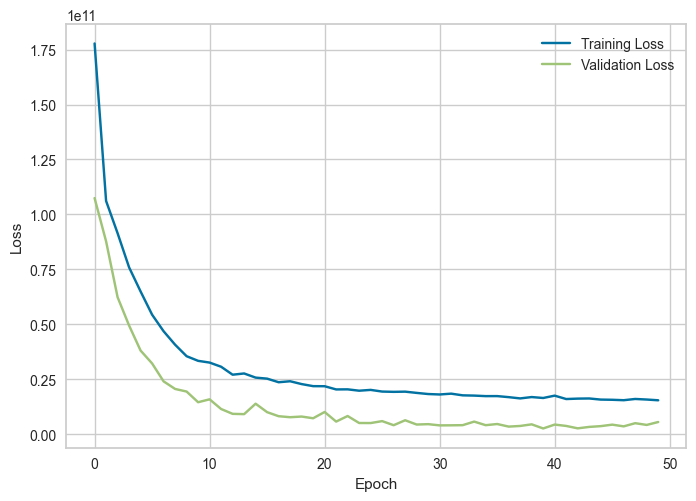

In [205]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the TensorFlow model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.5),  # Adding dropout for regularization
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.4),  # Adding dropout for regularization
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Adding dropout for regularization
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

# Custom callback to stop training when target is reached
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 0.1 and logs.get('val_mae') < 0.1:
            print("\n\nTarget tercapai\n")
            self.model.stop_training = True

# Build the model
model = build_model()

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the custom callback
target_callback = TargetCallback()

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping, target_callback])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# If you want to make predictions
predictions = model.predict(X_test_scaled)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Features Importance

Feature importances for AdaBoost model:
                     feature    importance
7      booking_earned_in_idr  4.560820e-01
8             length_of_stay  2.799065e-01
16   avg_daily_rate_per_unit  2.242822e-01
2             booking_earned  1.010732e-02
10                   unit_id  4.575543e-03
31     booking_check_in_date  2.659723e-03
6     review_sentiment_score  2.283705e-03
1       booking_guest_number  2.040547e-03
4                 listing_id  2.011296e-03
35   booking_check_out_month  1.963622e-03
27                   area_id  1.876066e-03
34    booking_check_out_date  1.860357e-03
23                   parking  1.598998e-03
12                  bathroom  1.530080e-03
32    booking_check_in_month  1.295792e-03
14                  capacity  8.682751e-04
28                 area_name  7.563185e-04
15               property_id  6.774620e-04
11                   bedroom  6.661980e-04
26              property_id1  5.784890e-04
36    booking_check_out_year  4.723831e-04
9             

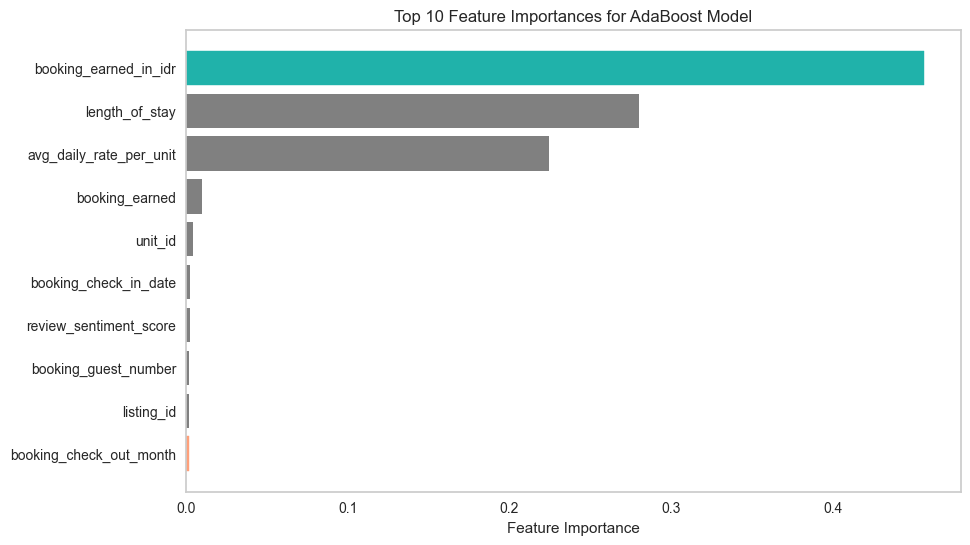

In [206]:
import matplotlib.pyplot as plt

# Asumsi model_adaboost sudah di-fit dan siap digunakan untuk mengambil feature importances
print("Feature importances for AdaBoost model:")
feature_importances_adaboost = model_adaboost.feature_importance()
print(feature_importances_adaboost)

# Membuat bar chart untuk feature importances
if isinstance(feature_importances_adaboost, pd.DataFrame):
    # Ambil 10 fitur teratas
    top_10_features = feature_importances_adaboost.nlargest(10, 'importance')

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(top_10_features['feature'], top_10_features['importance'], color='gray')
    
    # Warna khusus untuk fitur terpenting dan fitur terakhir
    bars[0].set_color('lightseagreen')
    bars[-1].set_color('lightsalmon')

    ax.set_xlabel('Feature Importance')
    ax.set_title('Top 10 Feature Importances for AdaBoost Model')
    ax.invert_yaxis()  # Membalik sumbu y agar fitur dengan importance tertinggi berada di atas
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    plt.show()
else:
    print("The best model does not support feature importance or there was an error.")


Feature importances for Decision Tree Model model:
                     feature    importance
16   avg_daily_rate_per_unit  6.337091e-01
7      booking_earned_in_idr  2.584965e-01
8             length_of_stay  1.041452e-01
2             booking_earned  1.983595e-03
10                   unit_id  2.665556e-04
29  area_distance_to_airport  2.276562e-04
4                 listing_id  1.818352e-04
14                  capacity  1.786943e-04
31     booking_check_in_date  1.367735e-04
34    booking_check_out_date  9.674681e-05
32    booking_check_in_month  8.765863e-05
35   booking_check_out_month  8.456838e-05
27                   area_id  7.320198e-05
15               property_id  7.100383e-05
33     booking_check_in_year  5.689561e-05
22                      pool  4.209109e-05
12                  bathroom  2.643271e-05
0             booking_status  2.529020e-05
9                seasonality  2.333294e-05
36    booking_check_out_year  1.876314e-05
25                   kitchen  1.267829e-05
26 

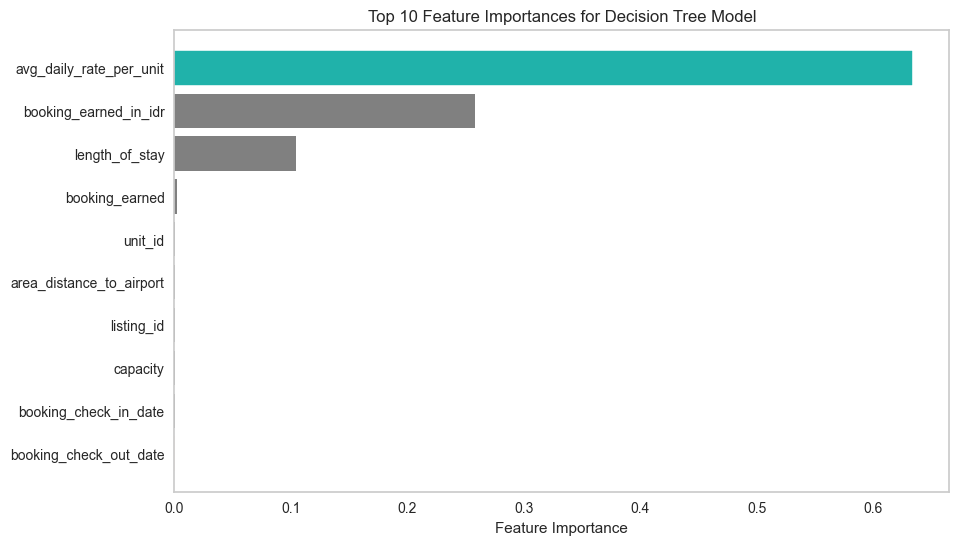

In [207]:
import matplotlib.pyplot as plt

# Asumsi model_adaboost sudah di-fit dan siap digunakan untuk mengambil feature importances
print("Feature importances for Decision Tree Model model:")
feature_importances_dt = model_dt.feature_importance()
print(feature_importances_dt)

# Membuat bar chart untuk feature importances
if isinstance(feature_importances_dt, pd.DataFrame):
    # Ambil 10 fitur teratas
    top_10_features = feature_importances_dt.nlargest(10, 'importance')

    fig, ax = plt.subplots(figsize=(10, 6))

    bars = ax.barh(top_10_features['feature'], top_10_features['importance'], color='gray')
    
    # Warna khusus untuk fitur terpenting dan fitur terakhir
    bars[0].set_color('lightseagreen')
    bars[-1].set_color('lightsalmon')

    ax.set_xlabel('Feature Importance')
    ax.set_title('Top 10 Feature Importances for Decision Tree Model')
    ax.invert_yaxis()  # Membalik sumbu y agar fitur dengan importance tertinggi berada di atas
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    plt.show()
else:
    print("The best model does not support feature importance or there was an error.")
